In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
df = pd.read_csv ("jual_rumah.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'jual_rumah.csv'

###### EDA

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [98]:
df.shape

(21613, 22)

In [99]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [103]:
#Drop columns yg gak penting

df.drop(df.columns[[0,1]] ,axis =1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [106]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [118]:
#Memahami data,Bedrooms sama bathrooms gak mungkin dong missing valuenya diganti mean..logisnya pake modus
print(df["bedrooms"].value_counts())

print("---------------------------------")
print("---------------------------------")

print(df["bathrooms"].value_counts())

3.0     9837
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: bedrooms, dtype: int64
---------------------------------
---------------------------------
2.500000    5380
1.000000    3852
1.750000    3048
2.250000    2047
2.000000    1930
1.500000    1446
2.750000    1185
3.000000     753
3.500000     731
3.250000     589
3.750000     155
4.000000     136
4.500000     100
4.250000      79
0.750000      72
4.750000      23
5.000000      21
5.250000      13
2.115736      10
5.500000      10
1.250000       9
6.000000       6
5.750000       4
0.500000       4
6.250000       2
8.000000       2
6.750000       2
6.500000       2
7.500000       1
7.750000       1
Name: bathrooms, dtype: int64


In [107]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [108]:
modus=df['bedrooms'].mode()
df['bedrooms'].replace(np.nan,modus[0], inplace=True)

In [111]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [112]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


#### Data Analysis

In [132]:
#Cara 1 mengambil variabel

df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [144]:
#Pake fitur crosstab dari pandas

pd.crosstab(index=df["floors"],columns="count")

col_0,count
floors,
1.0,10680
1.5,1910
2.0,8241
2.5,161
3.0,613
3.5,8


In [146]:
#Pake fitur crosstab dari pandas buat bikin tabel frekuensi (kaya bikin pivot tabel)

pd.crosstab(index=df["floors"],columns=df["bedrooms"])

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,33.0
floors,,,,,,,,,,,,
1.0,162,1951,5459,2383,605,104,9,5,0,1,0,1
1.5,21,182,786,698,185,30,7,1,0,0,0,0
2.0,12,497,3124,3682,775,119,19,6,4,2,1,0
2.5,1,5,56,58,23,14,2,0,2,0,0,0
3.0,3,123,407,61,13,5,1,0,0,0,0,0
3.5,0,2,5,0,0,0,0,1,0,0,0,0


In [1]:
#Cara 3 mengambil variabel , tanpa loc

df[["price","floors"]]

NameError: name 'df' is not defined

In [130]:
#Cara 2 mengambil variabel

df.loc[:,["floors","price",'bedrooms']]

,floors,price,bedrooms
0,1.0,221900.0,3.0
1,2.0,538000.0,3.0
2,1.0,180000.0,2.0
3,1.0,604000.0,4.0
4,1.0,510000.0,3.0
...,...,...,...
21608,3.0,360000.0,3.0
21609,2.0,400000.0,4.0
21610,2.0,402101.0,2.0
21611,2.0,400000.0,3.0


In [138]:
#Kalo yg ini ngambilnya pake iloc,bedanya iloc pake index angka

df.iloc[:,[4,5]]

,bedrooms,bathrooms
0,3.0,1.00
1,3.0,2.25
2,2.0,1.00
3,4.0,3.00
4,3.0,2.00
...,...,...
21608,3.0,2.50
21609,4.0,2.50
21610,2.0,0.75
21611,3.0,2.50


0    21450
1      163
Name: waterfront, dtype: int64


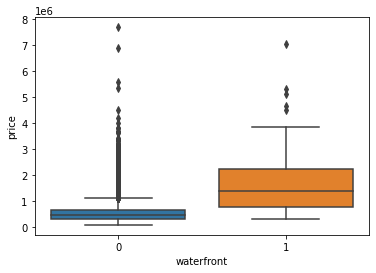

In [154]:
#Gunakan fungsi boxplot dalam seaborn library untuk menentukan apakah rumah dengan waterfront 
#(atau tidak memiliki waterfront) memiliki lebih banyak price outliers.
print(df.waterfront.value_counts())

sns.boxplot(x = "waterfront" , y = "price" , data = df)
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

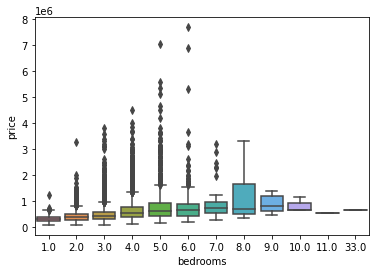

In [150]:
sns.boxplot(x = "bedrooms" , y = "price" ,data = df)

<AxesSubplot:xlabel='floors', ylabel='count'>

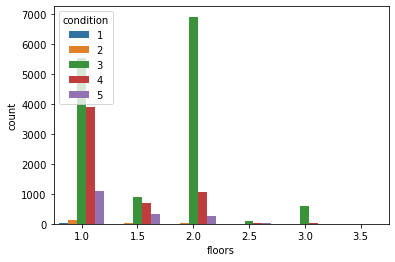

In [171]:
sns.countplot(x =df["floors"] , hue= df["condition"])

(0.0, 8081250.0)

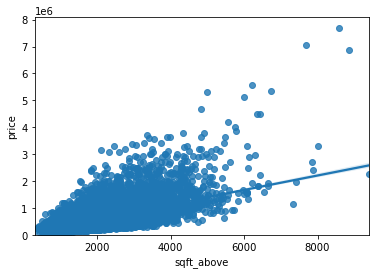

In [183]:
sns.regplot(x = "sqft_above" , y ="price", data=df)
plt.ylim (0,)

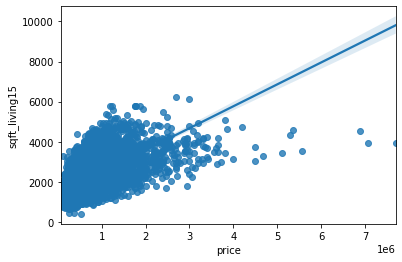

In [200]:
sns.regplot( x = df["price"], y= df["sqft_living15"])
plt.show()

In [178]:
#Binning buat variabel baru berdasarkan kelas

df [ "price_category"] = pd.cut(df["price"],bins = 4 ,precision = 0)
df [ "price_category"] 

0        (67375.0, 1981250.0]
1        (67375.0, 1981250.0]
2        (67375.0, 1981250.0]
3        (67375.0, 1981250.0]
4        (67375.0, 1981250.0]
                 ...         
21608    (67375.0, 1981250.0]
21609    (67375.0, 1981250.0]
21610    (67375.0, 1981250.0]
21611    (67375.0, 1981250.0]
21612    (67375.0, 1981250.0]
Name: price_category, Length: 21613, dtype: category
Categories (4, interval[float64]): [(67375.0, 1981250.0] < (1981250.0, 3887500.0] < (3887500.0, 5793750.0] < (5793750.0, 7700000.0]]

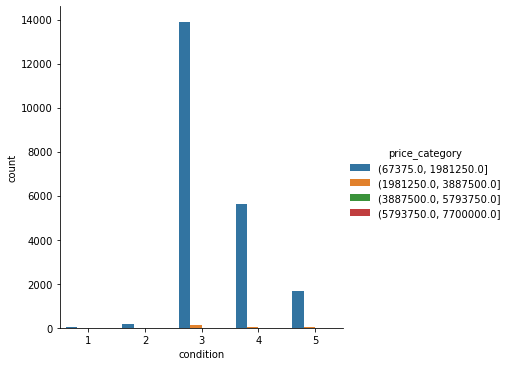

In [180]:
sns.catplot ( x = "condition" , hue = "price_category" , data=df ,kind = "count")

In [186]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308868
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

###### MODELING

In [187]:
#Kita dapat memakai model linear regression menggunakan fitur 'long' dan menghitung R^2.

#Cara klasik
#Linear Regresi

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [207]:
#Gunakan model linear regression 
#untuk memprediksi 'price' dengan menggunakan fitur 'sqft_living' kemudian hitung R^2.

#Linear Regresi

x=df[['sqft_living']]
y=df.price
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.4928532179037931

In [214]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" 
           ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [215]:
#hitung R^2."floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" 
           
#Multiple Regresi

x=df[features]
y=df.price
lr.fit(x,y)
lr.score(x,y)

0.6577465503330546

## Buatlah list of tuples, dengan elemen pertama dari tuple berisikan nama dari estimator: **
>>'scale'

>>'polynomial'

>>'model'

>Dan elemen kedua dari tuple berisi model constructor

>>StandardScaler()

>>PolynomialFeatures(include_bias=False)

>>LinearRegression()

In [209]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),
       ('model',LinearRegression())]

In [211]:
#Gunakan list tsb untuk membuat pipeline object untuk memprediksi 'price', 
#fit object tsb menggunakan features di dalam list features, dan hitung R^2.x=df[features]

#Polynomial

y=df.price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.751343204309882

##### Model Evaluation and Refinement

In [216]:
#Penentuan model terbaik 
#Import fitur cross_val dan train_test dari sklearn

#Cara machine learning

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [222]:
#Kita akan membagi data menjadi training dan testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
           "bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [223]:
#Buatlah Ridge regression object menggunakan training data, 
#set regularization parameter menjadi 0.1, dan hitung R^2 menggunakan test data.

from sklearn.linear_model import Ridge

Linear least squares dengan l2 regularization.
Model ini merupakan solusi regression model dimana loss function merupakan fungsi linear least square dan regularization ditentukan oleh l2-norm. Yang juga dikenal sebagai Ridge Regression or Tikhonov regularization. Estimator ini memiliki built-in support untuk multi-variate regression (i.e., saat y merupakan 2d-array dari shape [n_samples, n_targets]).

In [224]:
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6478978148771286

Lakukan transformasi second order polynomial pada training data dan testing data. Buatlah Ridge regression object menggunakan training data, set regularisation parameter menjadi 0.1, dan hitung R^2 menggunakan test data yang ada.

In [227]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1)

#Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.7002760273520635